### Introduction

**Average Daily Rate (ADR)** would be one of the main factors of hotel booking about which the executives of the hospitality establishment would be most inquisitive. It is directly related to the sales of the hotel business, and can largely affect the hotel business performance. 

This project thoroughly scrutinizes the Average Daily Rates and looks into how they are distributed in relation to other features and how they are affected by the seasons or occasions. Also, the relationships between Average Daily Rates and other features are statistically analyzed and visualized. This project features advanced visualizations and extensive statistical investigation.

These are the findings that can lead to meaningful insights for stakeholders in the establishment. The findings inform about the factor(s) the Average Daily Rates are determined based on, which is an important piece of information when it comes to hotel business operation.


---
#### Table of Contents

[Data Collection](#Data-Collection)<br>
[Data Cleaning and Data Pre-processing](#Data-Cleaning-and-Data-Pre-processing)<br>
⌎ [Missing Value Imputation and Feature Extraction/Transformation](#Missing-Value-Imputation-and-Feature-Extraction/Transformation)<br>
⌎ [Outlier Detection and Removal](#Outlier-Detection-and-Removal)<br>
[Fundamental Analysis of Average Daily Rate](#Fundamental-Analysis-of-Average-Daily-Rate)<br>
⌎ [Normality Tests](#Normality-Tests)<br>
⌎ [Statistics and Visualization of ADR Distribution](#Statistics-and-Visualization-of-ADR-Distribution)<br>
[Correlation Analysis](#Correlation-Analysis)<br>
⌎ [Visualization of Correlations](#Visualization-of-Correlations)<br>
⌎ [Statistical Analysis](#Statistical-Analysis)<br>
[Analysis over Time Series Features](#Analysis-over-Time-Series-Features)<br>
⌎ [ADR over the Entire Time Frame](#ADR-over-the-Entire-Time-Frame)<br>
⌎ [Average Distribution by Year, Month, Week, and Day](#Average-Distribution-by-Year,-Month,-Week,-and-Day)<br>

---

In [1]:
from IPython.display import display
from IPython.display import display_html 
from IPython.core.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.io as pio
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import datetime
import sort_dataframeby_monthorweek as sd

from scipy import stats
import scipy.special as special
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import anderson

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")
pio.templates.default = "plotly_white"

import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
# path

df = pd.read_csv(path+'/hotel_bookings.csv')

display(df)
display(df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

### Data Cleaning and Data Pre-processing

In [3]:
# adjust to exactly 2-year time frame for accurate analysis

df = df[~((df.arrival_date_year == 2015) & (df.arrival_date_month.isin(['July','August'])))].reset_index(drop=True)

# only keep bookings with at least one guest

filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
df = df[~filter].reset_index(drop=True)

#### Missing Value Imputation and Feature Extraction/Transformation

In [4]:
# null values imputation

df.fillna(0,inplace=True)
df.isnull().values.any()

False

In [5]:
# unlike previous projects, df will be used instead of creating a new dataframe that only contains bookings not cancelled (df_clean)
# so feature extraction/transformation will be performed on the original dataframe, df


# create new features needed from existing features


# number of total nights stayed is the sum of week nights and weekend nights stayed

df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# number of total kids including children and babies

df['total_kids'] = df['children'] + df['babies']

# room type change?

def f(row):
    if row['reserved_room_type'] == row['assigned_room_type']:
        val = 0
    else:
        val = 1
    return val

df['room_type_change'] = df.apply(f, axis=1)

# children or babies?

if np.array_equal(df.children, df.children.astype(int)) == True:
    df['children'] = df['children'].astype(int)

def f(row):
    if row['children'] + row['babies'] == 0:
        val = 0
    else:
        val = 1
    return val

df['kids'] = df.apply(f, axis=1)

In [6]:
# change data type of features 'agent' and 'company' so they are categorized as categorical type features

df[['agent','company']] = df[['agent','company']].apply(pd.to_numeric, downcast='integer').astype(object)

# downcast numerical columns

num = df.select_dtypes(exclude = ["object"]).columns

df[num] = df[num].apply(pd.to_numeric, downcast='integer')

In [7]:
display(df.head())
display(df.shape)
display(df.dtypes)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_kids,room_type_change,kids
0,Resort Hotel,1,38,2015,September,36,1,0,2,2,1,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250,0,0,Transient,123.00,0,0,Canceled,2015-08-06,2,2,0,1
1,Resort Hotel,1,47,2015,September,36,1,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Canceled,2015-07-22,2,0,0,0
2,Resort Hotel,0,48,2015,September,36,1,0,3,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,151.00,0,0,Check-Out,2015-09-04,3,0,0,0
3,Resort Hotel,0,48,2015,September,36,1,0,3,2,0,0,HB,ESP,Direct,Direct,0,0,0,A,C,0,No Deposit,250,0,0,Transient,134.67,0,1,Check-Out,2015-09-04,3,0,1,0
4,Resort Hotel,0,27,2015,September,36,1,0,3,2,1,0,HB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250,0,0,Transient,153.00,0,2,Check-Out,2015-09-04,3,1,0,1


(112553, 36)

hotel                              object
is_canceled                          int8
lead_time                           int16
arrival_date_year                   int16
arrival_date_month                 object
arrival_date_week_number             int8
arrival_date_day_of_month            int8
stays_in_weekend_nights              int8
stays_in_week_nights                 int8
adults                               int8
children                             int8
babies                               int8
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                    int8
previous_cancellations               int8
previous_bookings_not_canceled       int8
reserved_room_type                 object
assigned_room_type                 object
booking_changes                      int8
deposit_type                       object
agent                             

#### Outlier Detection and Removal

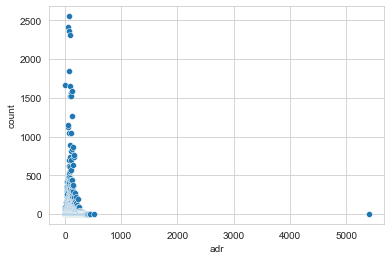

In [8]:
df_adr_count = df.groupby('adr').count().reset_index()[['adr','hotel']].rename(columns={'hotel':'count'})
sns.scatterplot(x='adr', y='count', data=df_adr_count)
plt.show()

In [9]:
df.adr.sort_values().tail()

11899      437.0
11650      450.0
97127      451.5
104582     510.0
43630     5400.0
Name: adr, dtype: float64

In [10]:
df.loc[df.adr > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_kids,room_type_change,kids
43630,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,1,0,0,0


In [11]:
print('Number of records before outlier removal: ' + str(df.shape[0]))

# outlier removal

df = df[df['adr'] < 5000].reset_index(drop=True)

print('Number of records after outlier removal: ' + str(df.shape[0]))

Number of records before outlier removal: 112553
Number of records after outlier removal: 112552


In [12]:
# divide features by characteristics

disc = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
        'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'total_kids']

cat = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 
       'customer_type']

binary = ['is_canceled', 'is_repeated_guest', 'room_type_change', 'kids']

time = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

# not taking into account/irrelevant: 'reservation_status', 'reservation_status_date'

### Fundamental Analysis of Average Daily Rate

#### Normality Tests

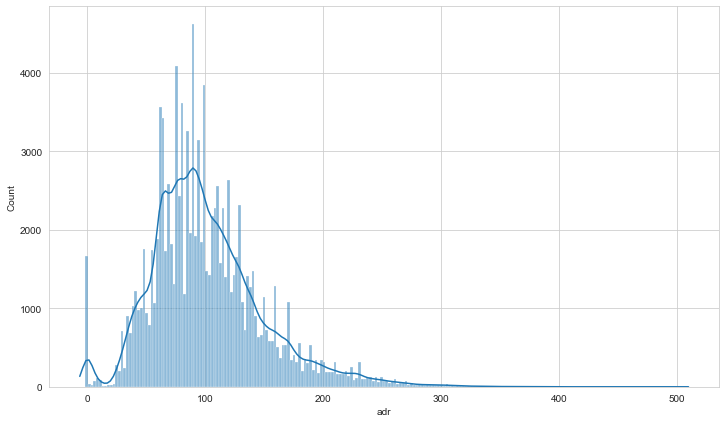

In [13]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='adr', kde=True)
plt.show()

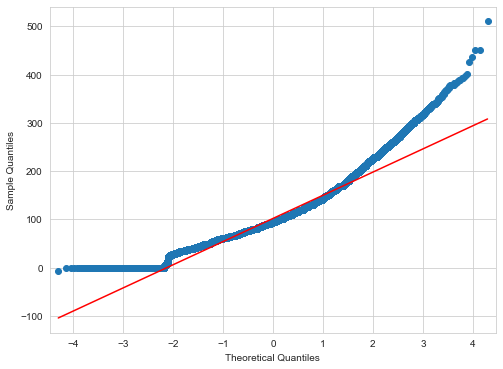

In [14]:
plt.rc('figure', figsize=(8,6))
qqplot(df['adr'], line='s')
plt.show()

In [15]:
# D'Agostino and Pearson's Test

stat, p = normaltest(df['adr'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=19907.210, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
# Anderson-Darling Test

result = anderson(df['adr'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1434.762
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


The normality tests conclude that the ADR is not normally distributed.

#### Statistics and Visualization of ADR Distribution

In [17]:
df[['adr']].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
adr,112552.0,101.88,48.04,-6.38,70.0,95.0,126.0,510.0


adr
(-25, 0]       1662
(0, 25]         594
(25, 50]       9364
(50, 75]      23336
(75, 100]     28809
(100, 125]    20131
(125, 150]    13316
(150, 175]     6951
(175, 200]     3738
(200, 225]     2115
(225, 250]     1330
(250, 275]      627
(275, 300]      305
(300, 325]      155
(325, 350]       68
(350, 375]       27
(375, 400]       18
(400, 425]        1
(425, 450]        3
(450, 475]        1
(475, 500]        0
(500, 525]        1
(525, 550]        0
Name: adr, dtype: int64

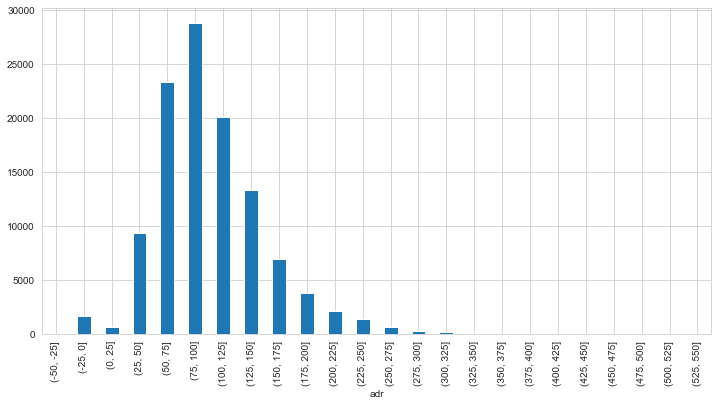

In [18]:
display(df['adr'].groupby(pd.cut(df['adr'],bins=np.arange(-25, 551, 25))).size())

plt.figure(figsize=(12,6))
df['adr'].groupby(pd.cut(df['adr'],bins=np.arange(-50, 551, 25))).size().plot(kind='bar')
plt.show()

In [19]:
def df_display(list_dfs, cols=2):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

In [20]:
# for features with many unique values, only top 12 most frequent values are evaluated

stat_dfs = []

for column in disc+cat+binary:
    if df[column].nunique() < 13:
        stat_dfs.append(df[[column,'adr']].groupby(column).describe().round(2))
    else:
        stat_dfs.append(df[[column,'adr']].groupby(column).describe().round(2).\
                        sort_values(df[[column,'adr']].groupby(column).describe().columns[0],ascending=False)[:12])
        
df_display(stat_dfs)

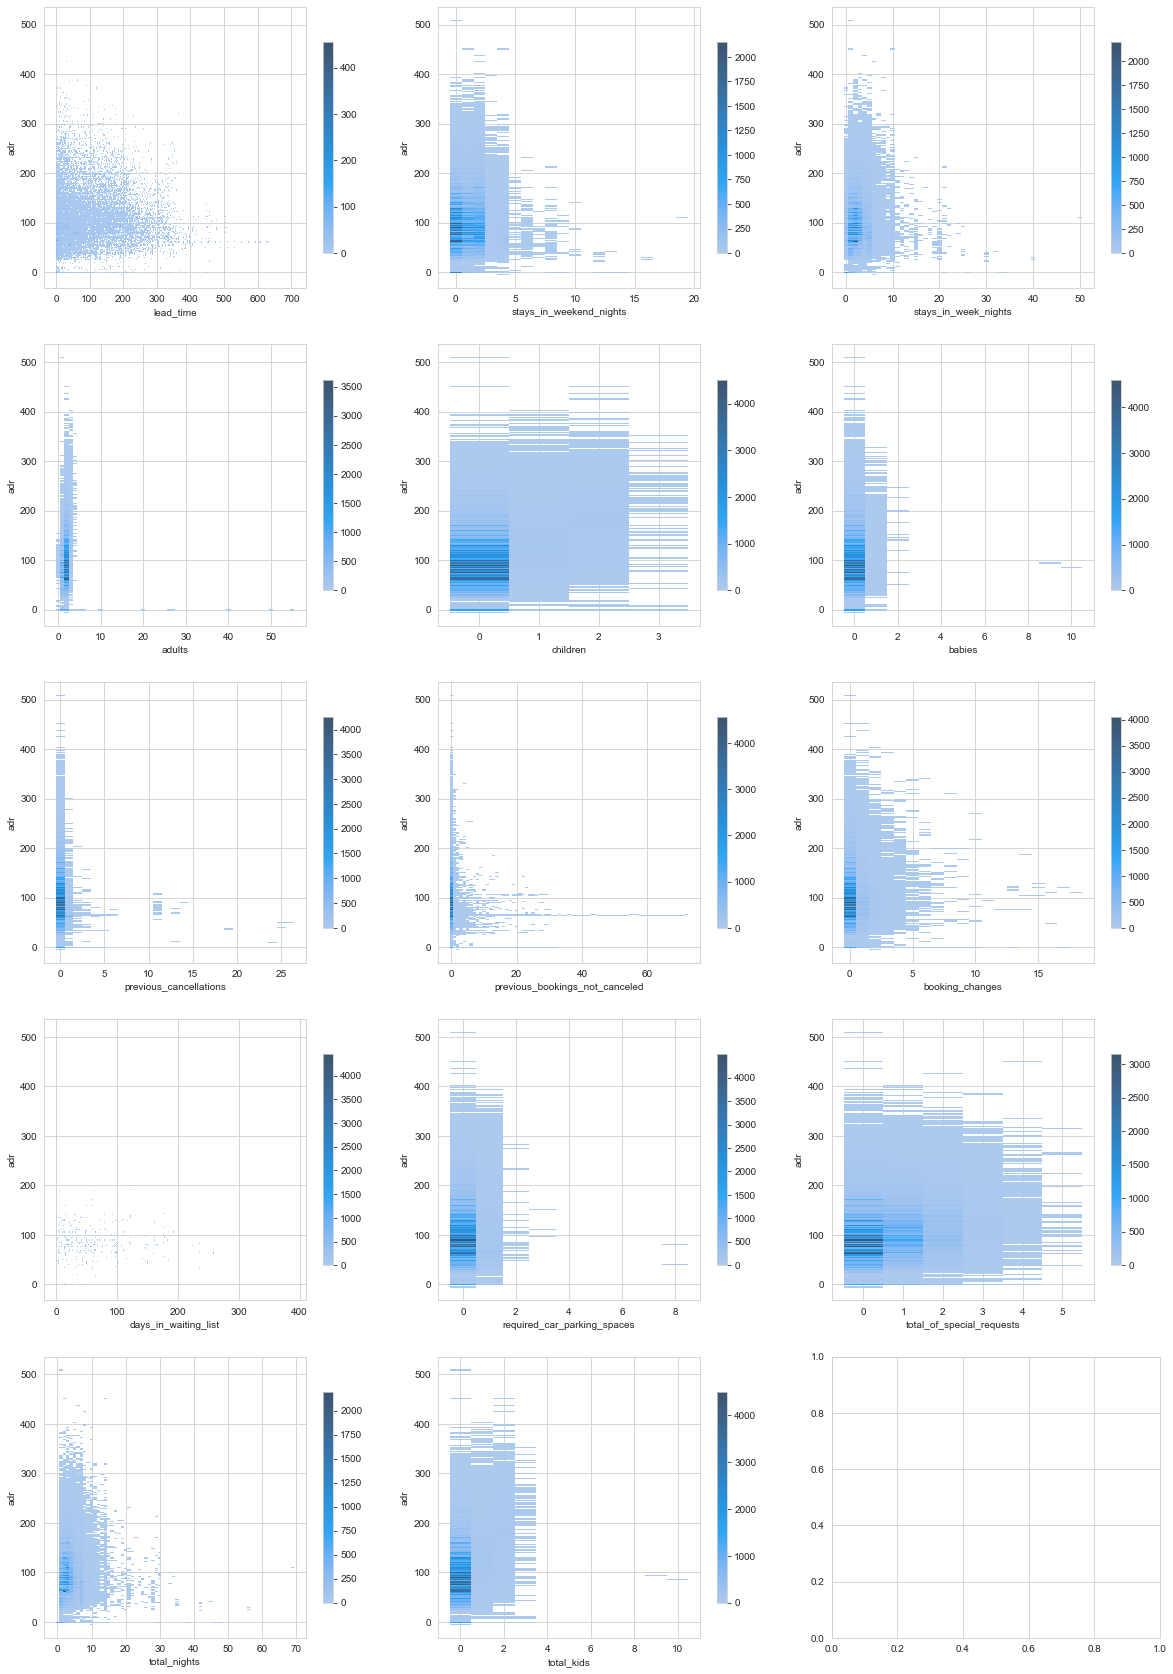

In [21]:
# distribution of adr on discrete features

f, ax = plt.subplots(5, 3, figsize=(20,30))

for column, ax in zip(disc, ax.flat):
    sns.histplot(df, x=column, y='adr', ax=ax, discrete=(True, False), cbar=True, cbar_kws=dict(shrink=.75))

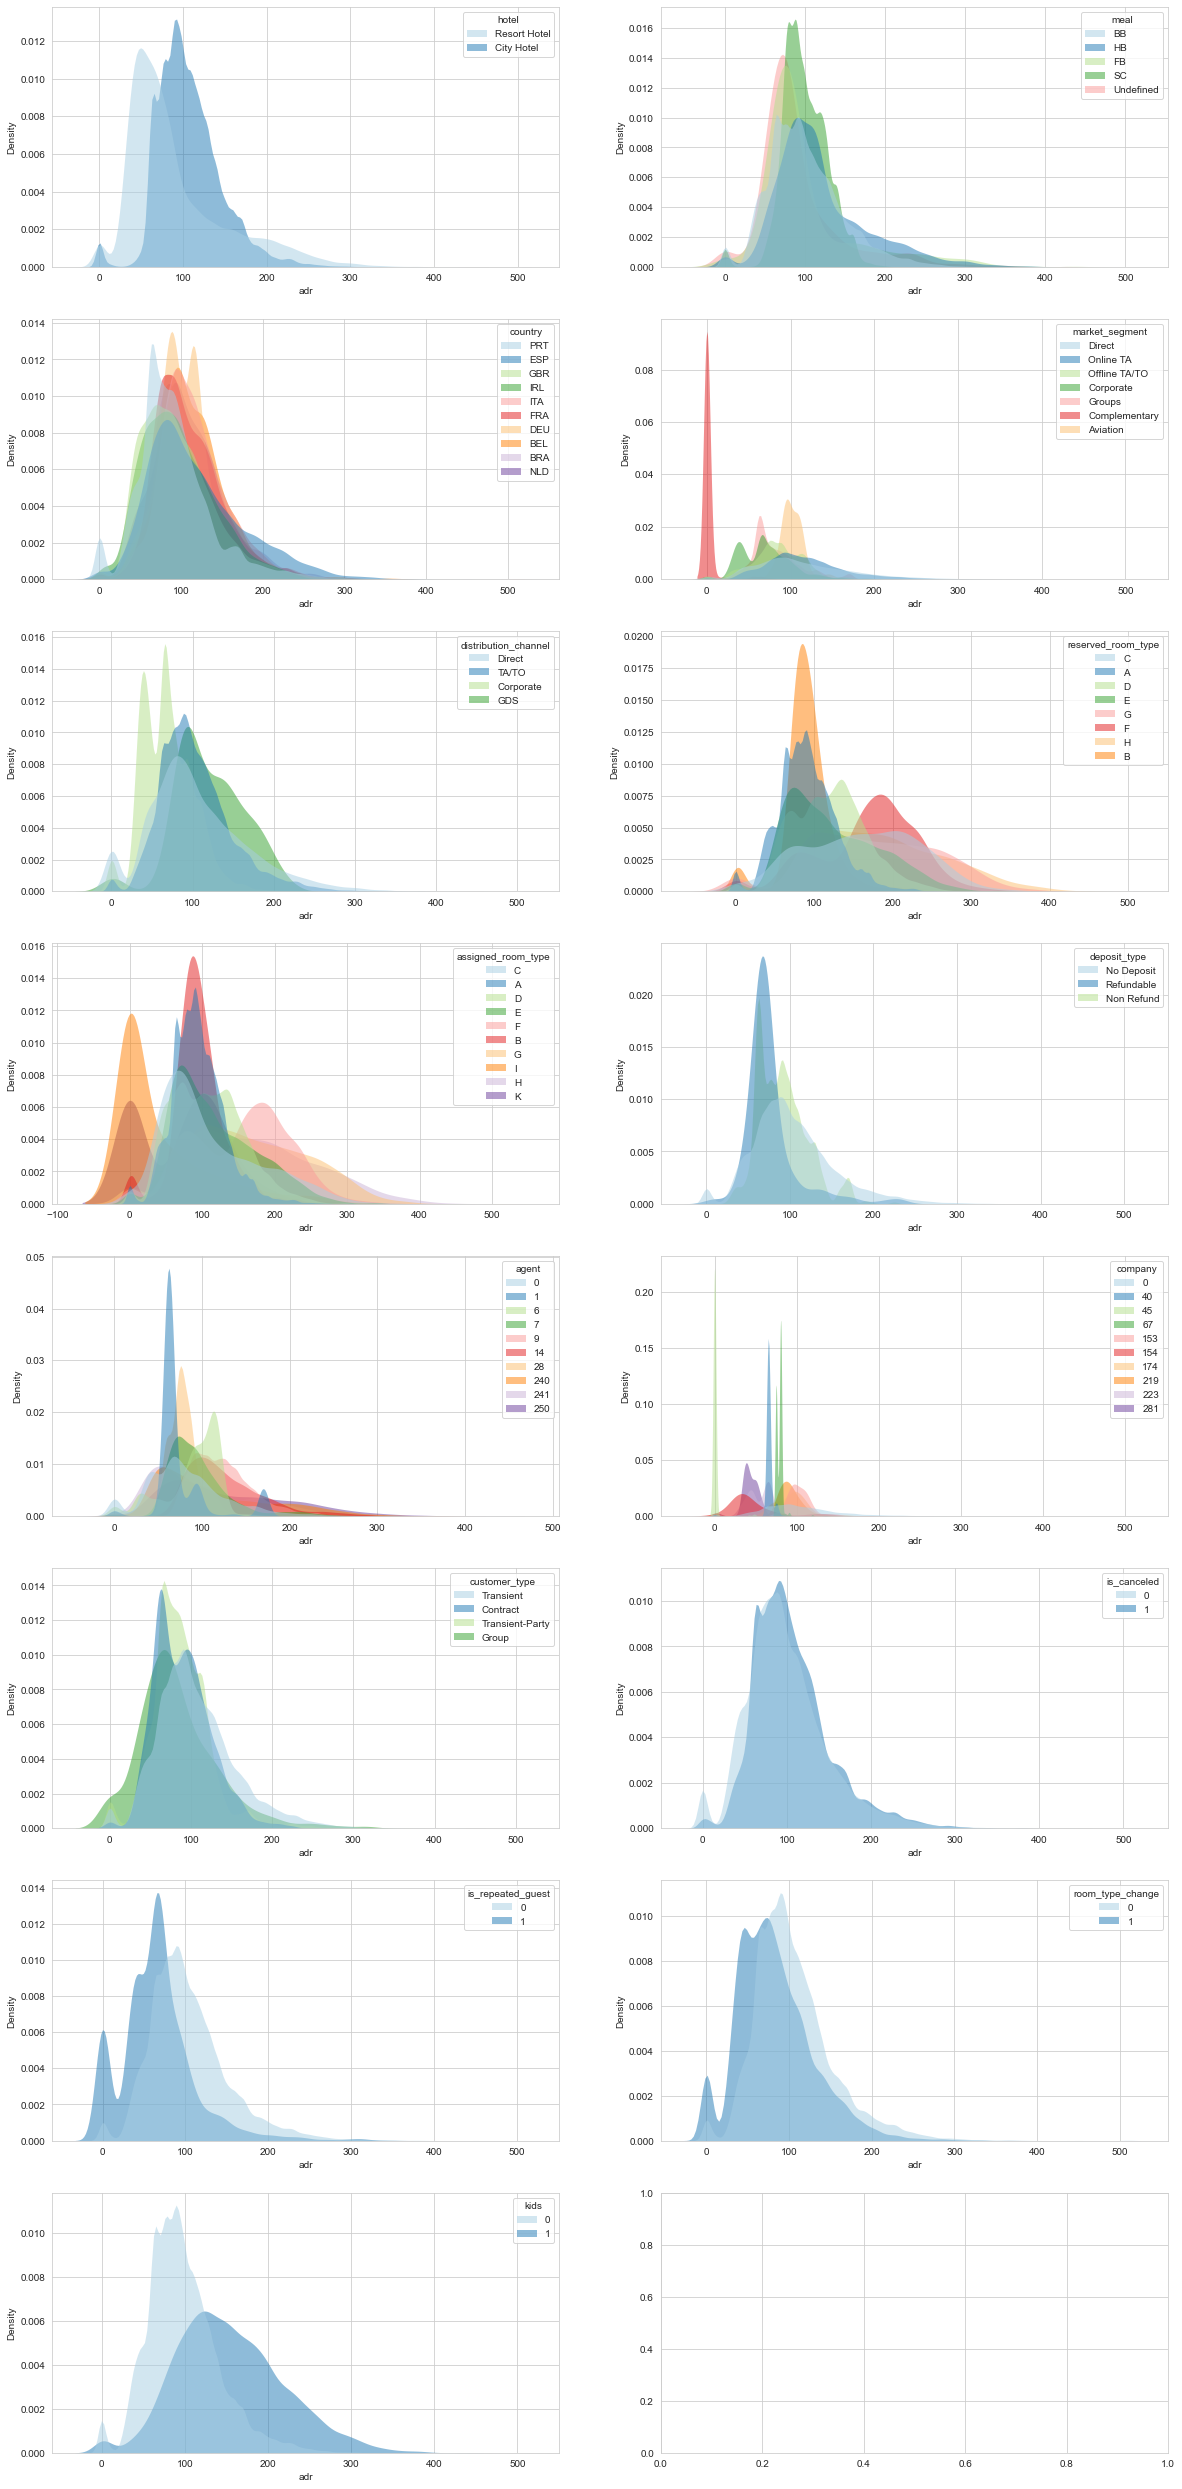

In [22]:
# distribution of adr on categorical and binary features

f, ax = plt.subplots(8, 2, figsize=(20,45))

for column, ax in zip(cat+binary, ax.flat):
    if len(df[column].unique()) < 11:
        sns.kdeplot(data=df, x='adr', hue=column, fill=True, common_norm=False, palette='Paired', alpha=.5, linewidth=0, ax=ax)
    else:
        sns.kdeplot(data=df[df[column].isin(df[column].value_counts()[:10].sort_values(ascending=False).index)][[column,'adr']],
                    x='adr', hue=column, fill=True, common_norm=False, palette='Paired', alpha=.5, linewidth=0, ax=ax)

### Correlation Analysis

#### Visualization of Correlations

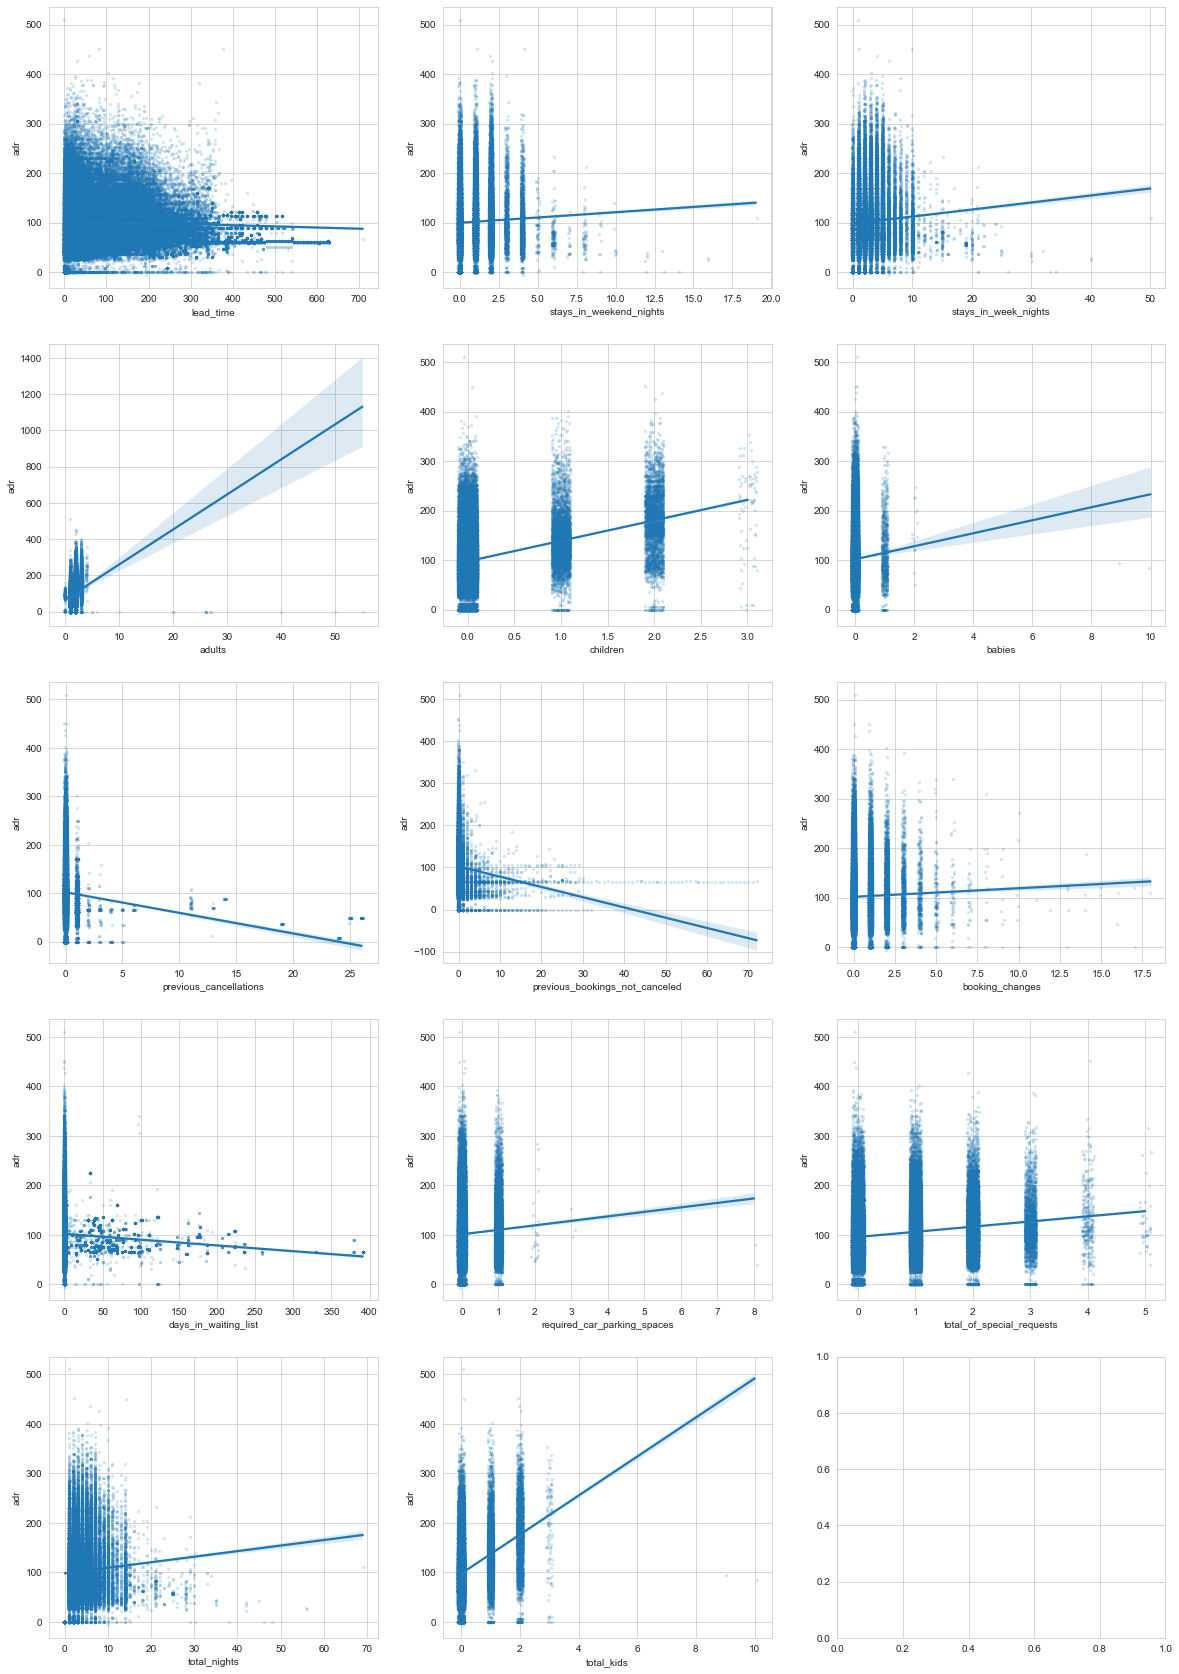

In [23]:
# discrete features vs adr

f, ax = plt.subplots(5, 3, figsize=(20,30))

for column, ax in zip(disc, ax.flat):
    sns.regplot(x=column, y='adr', data=df, scatter_kws={'alpha':0.15, 's':5}, x_jitter=.1, ax=ax)

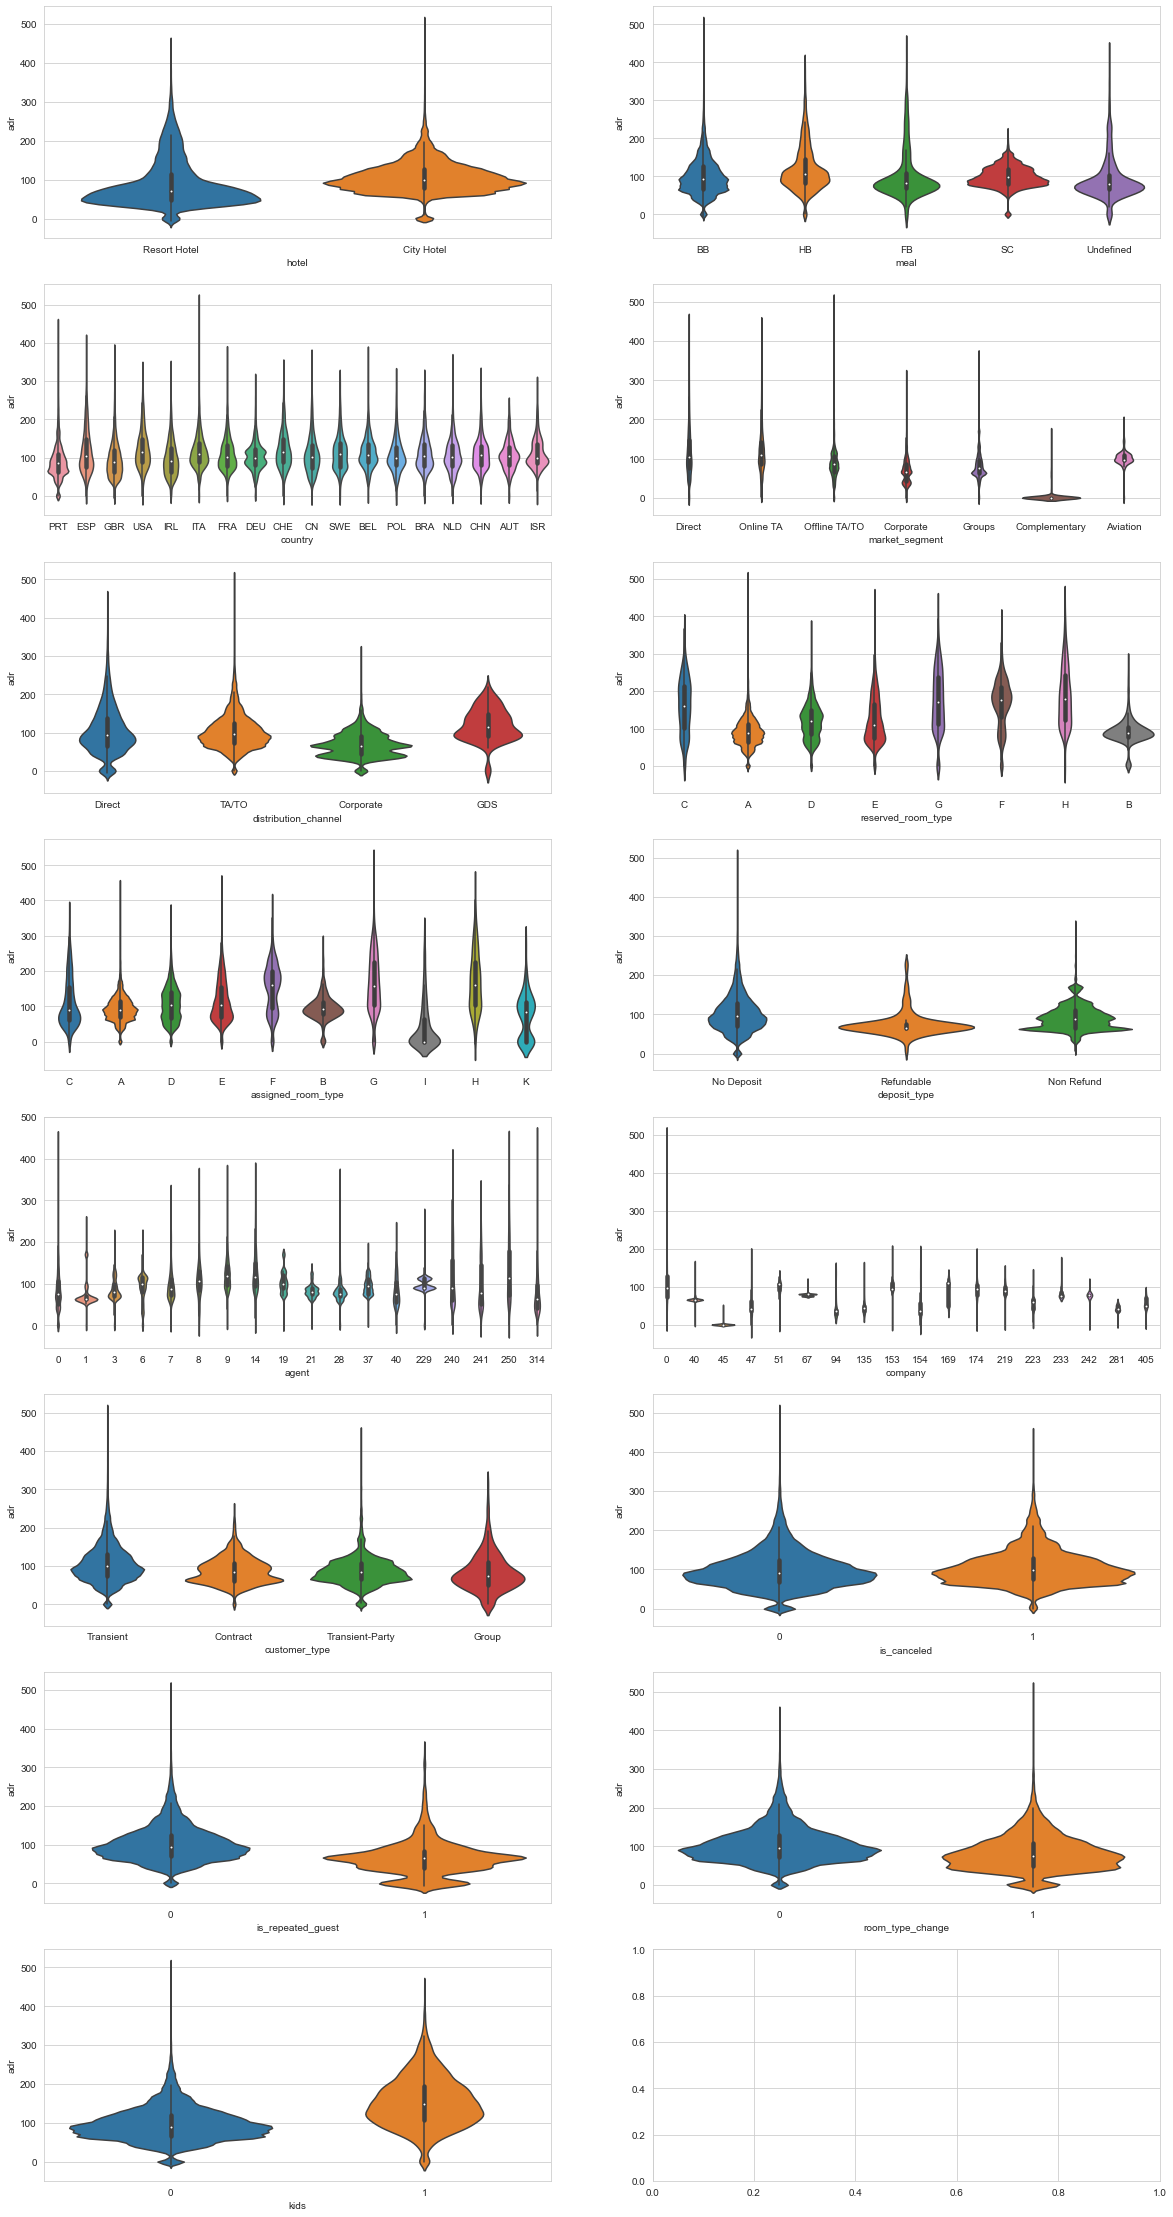

In [24]:
# categorical and binary features vs adr

f, ax = plt.subplots(8, 2, figsize=(20,40))

for column, ax in zip(cat+binary, ax.flat):
    if len(df[column].unique()) < 18:
        sns.violinplot(x=column, y='adr', data=df, ax=ax)
    else:
        sns.violinplot(x=column, y='adr', data=df[df[column].isin(df[column].value_counts()[:18].sort_values(ascending=False).index)][[column,'adr']], ax=ax)

#### Statistical Analysis

In [25]:
# discrete variables vs adr

disc_stat = pd.DataFrame({'feature':disc})

pr_list = []
pv_list = []

for column in disc:
    x = df[column]
    y = df['adr']
    pr = stats.pearsonr(x, y)
    pr_list.append(pr[0])
    pv_list.append(pr[1])

disc_stat['pearson'] = pr_list
disc_stat['p-value'] = pv_list

In [26]:
def epsilon2(h, n): # h - Kruskal-Wallis test statistic value ; n - total number of observations
    return h/((n**2 - 1)/(n+1))

def eta2(h, n, k): # h - Kruskal-Wallis test statistic value ; k - number of groups ; n - total number of observations.
    return (h - k + 1)/(n - k) 

In [27]:
# categorical and binary variables vs adr

cat_bin_stat = pd.DataFrame({'feature':cat+binary})

kw_list = []
pv_list = []
ep_list = []
es_list = []

for column in cat+binary:
    df_out = pd.pivot(df, columns=column, values='adr').reset_index(drop=True)
    kw = stats.kruskal(*(df_out[column].dropna().to_list() for column in df_out.columns))[0]
    pv = stats.kruskal(*(df_out[column].dropna().to_list() for column in df_out.columns))[1]
    ep = epsilon2(kw, df.shape[0])
    es = eta2(kw, df.shape[0], df[column].nunique())
    kw_list.append(kw)
    pv_list.append(pv)
    ep_list.append(ep)
    es_list.append(es)
    
cat_bin_stat['kruskal-wallis'] = kw_list
cat_bin_stat['p-value'] = pv_list
cat_bin_stat['epsilon-squared'] = ep_list
cat_bin_stat['eta-squared'] = es_list

In [28]:
# function that boldizes features with strong correlations based on effect size

def correlated(df, threshold, column):
    is_max = pd.Series(data=False, index=df.index)
    is_max[column] = df.loc[column] > threshold
    return ['font-weight: bold' if is_max.any() else '' for v in is_max]

# functon that greys out features that are not significant based on p-values

def insignificant(df, threshold):
    is_min = pd.Series(data=False, index=df.index)
    is_min['p-value'] = df.loc['p-value'] > threshold
    return ['color: grey' if is_min.any() else '' for v in is_min]

alpha = 0.05

pr_thres = 0.50
es_thres =  0.14

disc_sum = disc_stat.style.apply(correlated, threshold=pr_thres, column=['pearson'], axis=1).apply(insignificant, threshold=alpha, axis=1).\
          set_table_attributes("style='display:inline'").set_caption('Discrete')
cat_bin_sum = cat_bin_stat.style.apply(correlated, threshold=es_thres, column=['eta-squared'], axis=1).apply(insignificant, threshold=alpha, axis=1).\
              set_table_attributes("style='display:inline'").set_caption('Categorical and Binary')

display_html(disc_sum._repr_html_()+'\xa0\xa0\xa0'+cat_bin_sum._repr_html_(), raw=True)
print("Size of the sample: ", df.shape[0])

,feature,pearson,p-value
0,lead_time,-0.051879,0.000000
1,stays_in_weekend_nights,0.044087,0.000000
2,stays_in_week_nights,0.055782,0.000000
3,adults,0.235828,0.000000
4,children,0.342978,0.000000
5,babies,0.026278,0.000000
6,previous_cancellations,-0.069652,0.000000
7,previous_bookings_not_canceled,-0.078057,0.000000
8,booking_changes,0.023272,0.000000
9,days_in_waiting_list,-0.043918,0.000000


Size of the sample:  112552


The statistics used to analyze the relationships between ADR and other features are the Pearson product-moment correlation coefficient (PPMCC) and Kruskal–Wallis H test. For Pearson, the correlation itself is interpretable as effect size, but for Kruskal-Wallise test, epsilon-squared and eta-squared are calculated for effect size.

The **Pearson correlation coefficient** (denoted by r) is a measure of the strength of the linear correlation between two sets of data. It takes a range of values from -1 to +1, with a value of 0 indicating that there is no association between the two variables. A positive value indicates a positive association and a negative value indicates a negative association. Coefficients of +1 or -1 mean that all the data points are on the line of best fit, and that there are no data points that show variation away from this line. Values between +1 and -1 indicate variation around the line of best fit; the closer the value to 0, the greater the variation around the line of best fit.

Interpretations of Pearson correlation coefficients as effect size are as follows: a correlation coefficient of 0.10 indicates a weak association; a correlation coefficient of 0.30 indicates a moderate association; a correlation coefficient of 0.50 or larger indicates a strong association (Cohen, 1988).

The **Kruskal-Wallis H test** determines whether there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the one-way ANOVA, and tests the null hypothesis that the population medians of all groups are equal. The Kruskal-Wallis test with only two groups is equivalent to the Mann-Whitney U-test.

For the Kruskal-Wallist test, there is not a single agreed-upon method of calculating effect size. Common effect size statistics for the Kruskal–Wallis test include epsilon-squared and eta-squared, and they often produce similar results. Interpretations of eta-squared for the Kruskal-Wallis test were used and they are defined as follows: a value of 0.01 indicates small effect; a value of 0.06 indicates moderate effect; a value of 0.14 or greater indicates large effect.

There appears to be sufficient evidence to conclude that all the features have statistically significant differences in ADR since there are no corresponding p-values greater the alpha, but the outcomes for effect size only highlight a couple features to be having strong correlations to ADR.

In [29]:
relevant_features = []

for i, row in disc_stat.iterrows():
    if (row['pearson'] > pr_thres) & (row['p-value'] <= alpha):
        relevant_features.append(row['feature'])
        
for i, row in cat_bin_stat.iterrows():
    if (row['eta-squared'] > es_thres) & (row['p-value'] <= alpha):
        relevant_features.append(row['feature'])

print("The following features appear to have significant correlations to ADR but do not imply direct causality: ")
print(*relevant_features, sep=', ')

The following features appear to have significant correlations to ADR but do not imply direct causality: 
market_segment, agent


### Analysis over Time Series Features

#### ADR over the Entire Time Frame

In [30]:
df['year'] = df['arrival_date_year'].copy()
df['month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month.astype(int)
df['day'] = df['arrival_date_day_of_month'].copy()

df['date'] = pd.to_datetime(df[['year','month','day']])

df_adr = df.groupby('date')[['adr']].mean().rename(columns={'adr':'All Hotels'})
df_adr['Resort Hotel'] = df[df['hotel'] == 'Resort Hotel'].groupby('date')[['adr']].mean().adr
df_adr['City Hotel'] = df[df['hotel'] == 'City Hotel'].groupby('date')[['adr']].mean().adr
df_adr.rename_axis(index='Date', inplace=True)
df_adr = df_adr.round(2)

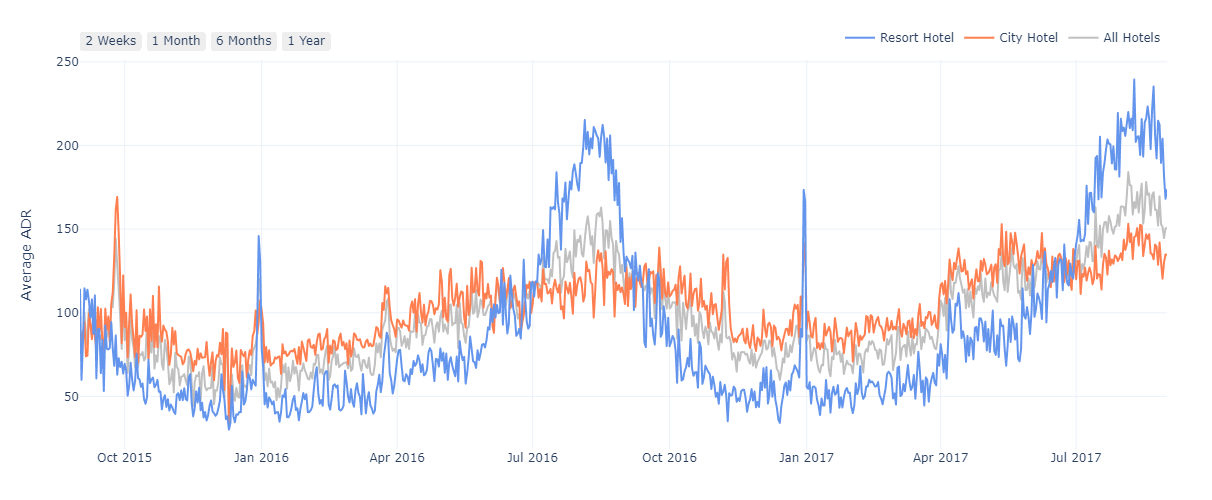

In [31]:
fig = px.line(df_adr, x=df_adr.index, y=['All Hotels','City Hotel','Resort Hotel'], height=500, labels={'value':'Average ADR','Date':'','variable':''},
              color_discrete_map={'Resort Hotel':'cornflowerblue','City Hotel':'coral','All Hotels': 'silver'})
    
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1),
                 margin=dict(r=45, b=10))

time_buttons = [
    {'count': 14, 'step': 'day', 'stepmode': 'todate', 'label': '2 Weeks'},
    {'count': 1, 'step': 'month', 'stepmode': 'todate', 'label': '1 Month'},
    {'count': 6, 'step': 'month', 'stepmode': 'todate', 'label': '6 Months'},
    {'count': 1, 'step': 'year', 'stepmode': 'todate', 'label': '1 Year'}
]

fig.update_layout(hovermode="x unified", legend_traceorder='reversed')
fig.update_xaxes(
    rangeselector={'buttons': time_buttons}
)
fig.update_traces(hovertemplate='&#36;%{y}')

The above graph is user-interactive. By using the controls located in the upper-right corner, you can zoom in or move along the timeline back and forth and assess a better view of the daily average ADR over the entire time frame of the dataset. Buttons located in the upper-left corner allow zoomed-in views of the line plots by 2 weeks, 1 month, 6 months, and 1 year. Try clicking the cross-shaped "Pan" button in the upper-right corner and moving left and right.
<br>
Notice that the average ADR spikes up on year-end holidays for all hotel types, and during the summer season for the Resort Hotel.

#### Average Distribution by Year, Month, Week, and Day

In [32]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

stat_dfs = []

for column in time:
    if column == 'arrival_date_month':
        stat_dfs.append(df[[column,'adr']].groupby(column).describe().round(2).reindex(months))
    else:
        stat_dfs.append(df[[column,'adr']].groupby(column).describe().round(2))
        
df_display(stat_dfs)

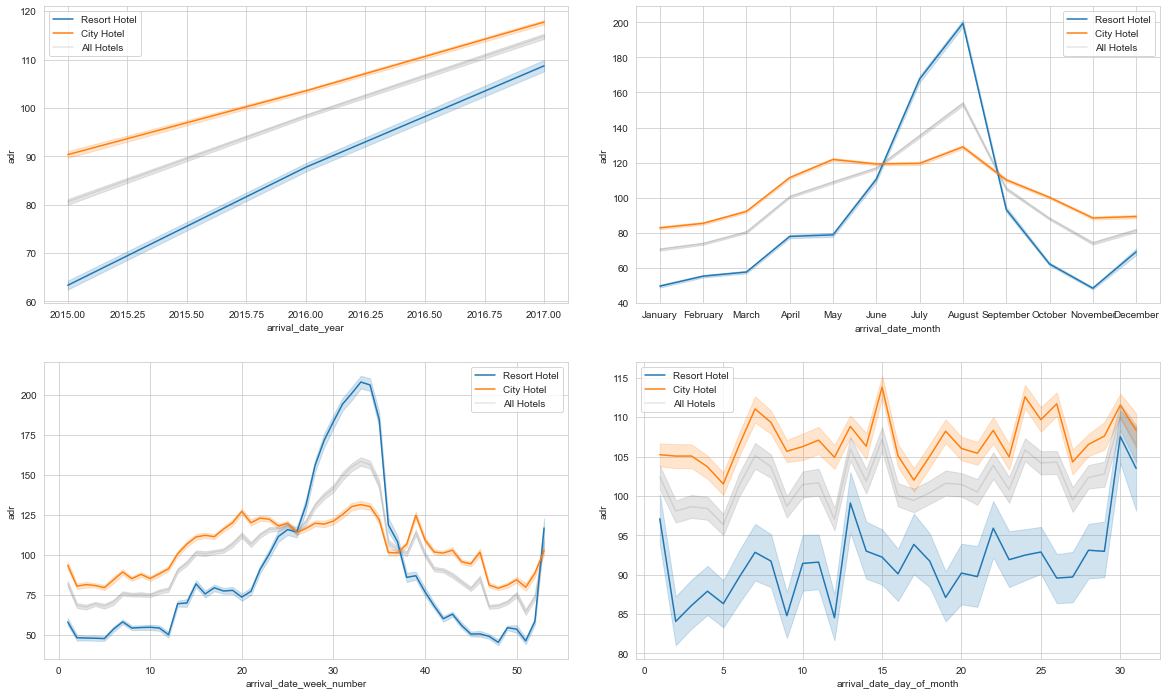

In [33]:
# adr for time series

f, ax = plt.subplots(2, 2, figsize=(20,12))

for column, ax in zip(time, ax.flat):
    sns.lineplot(x=column, y='adr', hue='hotel', data=sd.Sort_Dataframeby_Month(df=df, monthcolumnname='arrival_date_month'), ax=ax)
    sns.lineplot(x=column, y='adr', data=sd.Sort_Dataframeby_Month(df=df, monthcolumnname='arrival_date_month'), ax=ax, 
                 alpha=.2, label='All Hotels', color='grey')
    
f.subplots_adjust(wspace=0.13)

plt.show()

In [34]:
df_adr_time = pd.DataFrame(index=[col for col in time], columns=['from highest average adr to lowest average adr'])

i = 0

for column in time:
    old_list = df.groupby(column)['adr'].mean().sort_values(ascending=False).index.to_list()
    new_list = (', '.join(str(a)for a in old_list))
    df_adr_time.iloc[i,0] = new_list
    i+=1
    
df_adr_time

,from highest average adr to lowest average adr
arrival_date_year,"2017, 2016, 2015"
arrival_date_month,"August, July, June, May, September, April, October, December, March, November, February, January"
arrival_date_week_number,"33, 34, 32, 31, 35, 30, 29, 28, 27, 25, 24, 23, 26, 39, 20, 22, 36, 53, 19, 21, 37, 18, 17, 15, 16, 38, 40, 14, 41, 42, 13, 43, 46, 44, 1, 45, 12, 11, 7, 9, 50, 8, 10, 52, 6, 49, 4, 2, 48, 5, 47, 3, 51"
arrival_date_day_of_month,"30, 15, 31, 13, 24, 7, 26, 25, 22, 8, 29, 1, 28, 14, 11, 19, 10, 20, 6, 23, 21, 18, 16, 27, 17, 9, 3, 4, 2, 12, 5"


During the summer, the average ADR for the Resort Hotel rises to over twice the average ADR for the rest of the year. Also notice higher variations of the average ADR for the Resort Hotel.

> ### References
> <br>
>
> Brownlee, Jason. “A Gentle Introduction to Normality Tests in Python.” *Machine Learning Mastery*, 8 Aug. 2019, https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/. 
>
> Cohen, Jacob. "Statistical power analysis for the social sciences." (1988).
>
> “Pearson Correlation Coefficient.” *Wikipedia*, Wikimedia Foundation, 8 May 2022, https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#:~:text=In%20statistics%2C%20the%20Pearson%20correlation,between%20two%20sets%20of%20data. 
>
> “Pearson Product-Moment Correlation.” *Pearson Product-Moment Correlation - When You Should Run This Test, the Range of Values the Coefficient Can Take and How to Measure Strength of Association*., https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php. 
>
> Tomczak, Maciej, and Ewa Tomczak. "The need to report effect size estimates revisited. An overview of some recommended measures of effect size." *Trends in sport sciences* 1.21 (2014): 19-25.
>
> Mangiafico, S.S. 2016. Summary and Analysis of Extension Program Evaluation in R, version 1.19.10. rcompanion.org/handbook/. (Pdf version: rcompanion.org/documents/RHandbookProgramEvaluation.pdf.)
>
> “Kruskal-Wallis Effect Size - kruskal_effsize.” - *kruskal_effsize • Rstatix*, https://rpkgs.datanovia.com/rstatix/reference/kruskal_effsize.html. 